#### CASE STUDY - EXPLORATORY DATA ANALYSIS : AMD - INTEL - CPU BENCHMARKS

In [237]:
# IMPORTING THE DATA SET
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import warnings
warnings.filterwarnings('ignore')

In [238]:
amd = pd.read_csv(r"C:\Users\Ankit Khicha\amd_processors.csv")
intel = pd.read_csv(r"C:\Users\Ankit Khicha\intel_processors.csv")
cpubench = pd.read_csv(r"C:\Users\Ankit Khicha\cpu_benchmarks.csv")

In [105]:
amd.head(2)

,id,cores,threads,name,launch_date,lithography,base_frequency,turbo_frequency,cache_l1,cache_l2,cache_l3,tdp,product_line,socket,memory_type,url,vertical_segment,max_temp,max_memory_speed,sku
0,1,16.0,32.0,AMD Ryzen 9 5950X,2020-11-05,7.0,3400,4900.0,NaN,8192.0,65536.0,105.0,AMD Ryzen 9 Desktop Processors,AM4,DDR4,https://www.amd.com/en/product/10456,Boxed Processor,90.0,3200.0,10456
1,2,12.0,24.0,AMD Ryzen 9 5900X,2020-11-05,7.0,3700,4800.0,NaN,6144.0,65536.0,105.0,AMD Ryzen 9 Desktop Processors,AM4,DDR4,https://www.amd.com/en/product/10461,Boxed Processor,90.0,3200.0,10461


In [106]:
intel.head(2)

,id,cores,threads,name,processor_number,launch_date,lithography,bus_speed,base_frequency,turbo_frequency,...,socket,memory_type,url,vertical_segment,max_memory_size,status,max_temp,sku,package_size,fullname
0,1,2,2.0,Intel Atom C2338,C2338,2013-08-01,22.0,NaN,1700.0,2000.0,...,FCBGA1283,DDR3/DDR3L 1333,https://www.intel.com/content/www/us/en/produc...,Embedded,16777216.0,Launched,NaN,77976,34 mm x 28 mm,"Intel Atom Processor C2338 (1M Cache, 1.70 GHz)"
1,2,2,2.0,Intel Atom C2350,C2350,2013-08-01,22.0,NaN,1700.0,2000.0,...,FCBGA1283,DDR3/DDR3L 1333,https://www.intel.com/content/www/us/en/produc...,Server,16777216.0,Launched,98.0,77977,34 mm x 28 mm,"Intel Atom Processor C2350 (1M Cache, 1.70 GHz)"


In [107]:
cpubench.head(2)

,id,manufacturer,sku,rating,url
0,1,amd,10456,46113,https://www.cpubenchmark.net/cpu.php?cpu=AMD+R...
1,2,amd,10461,39634,https://www.cpubenchmark.net/cpu.php?cpu=AMD+R...


In [108]:
amd.shape

(538, 20)

In [109]:
intel.shape

(1098, 26)

In [110]:
cpubench.shape

(1667, 5)

In [111]:
amd.columns

Index(['id', 'cores', 'threads', 'name', 'launch_date', 'lithography',
       'base_frequency', 'turbo_frequency', 'cache_l1', 'cache_l2', 'cache_l3',
       'tdp', 'product_line', 'socket', 'memory_type', 'url',
       'vertical_segment', 'max_temp', 'max_memory_speed', 'sku'],
      dtype='object')

In [112]:
intel.columns

Index(['id', 'cores', 'threads', 'name', 'processor_number', 'launch_date',
       'lithography', 'bus_speed', 'base_frequency', 'turbo_frequency',
       'configurable_tdp_up_frequency', 'cache_size', 'tdp',
       'configurable_tdp_up', 'price', 'product_line', 'socket', 'memory_type',
       'url', 'vertical_segment', 'max_memory_size', 'status', 'max_temp',
       'sku', 'package_size', 'fullname'],
      dtype='object')

In [113]:
cpubench.columns

Index(['id', 'manufacturer', 'sku', 'rating', 'url'], dtype='object')

In [114]:
amd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                538 non-null    int64  
 1   cores             533 non-null    float64
 2   threads           478 non-null    float64
 3   name              538 non-null    object 
 4   launch_date       185 non-null    object 
 5   lithography       440 non-null    float64
 6   base_frequency    538 non-null    int64  
 7   turbo_frequency   457 non-null    float64
 8   cache_l1          285 non-null    float64
 9   cache_l2          476 non-null    float64
 10  cache_l3          331 non-null    float64
 11  tdp               523 non-null    float64
 12  product_line      538 non-null    object 
 13  socket            520 non-null    object 
 14  memory_type       503 non-null    object 
 15  url               538 non-null    object 
 16  vertical_segment  538 non-null    object 
 1

In [115]:
intel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1098 non-null   int64  
 1   cores                          1098 non-null   int64  
 2   threads                        1094 non-null   float64
 3   name                           1098 non-null   object 
 4   processor_number               1098 non-null   object 
 5   launch_date                    1098 non-null   object 
 6   lithography                    1089 non-null   float64
 7   bus_speed                      713 non-null    float64
 8   base_frequency                 1055 non-null   float64
 9   turbo_frequency                871 non-null    float64
 10  configurable_tdp_up_frequency  98 non-null     float64
 11  cache_size                     1098 non-null   int64  
 12  tdp                            1044 non-null   f

In [116]:
cpubench.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1667 non-null   int64 
 1   manufacturer  1667 non-null   object
 2   sku           1667 non-null   int64 
 3   rating        1667 non-null   int64 
 4   url           1667 non-null   object
dtypes: int64(3), object(2)
memory usage: 65.2+ KB


In [117]:
amd.describe()

,id,cores,threads,lithography,base_frequency,turbo_frequency,cache_l1,cache_l2,cache_l3,tdp,max_temp,max_memory_speed,sku
count,538.000000,533.000000,478.000000,440.000000,538.000000,457.000000,285.000000,476.000000,331.000000,523.000000,407.000000,442.000000,538.000000
mean,269.500000,8.221388,14.845188,21.454545,2859.211896,3684.463895,1834.635088,3787.294118,40106.151057,75.952103,86.056757,2414.757919,6003.184015
std,155.451493,10.689384,22.932795,10.181171,742.696634,581.104974,16409.339262,3762.119632,67740.518522,62.218723,13.499004,589.984217,3425.042337
min,1.000000,2.000000,2.000000,7.000000,56.000000,1500.000000,0.000000,512.000000,4096.000000,3.950000,57.000000,186.000000,1216.000000
25%,135.250000,4.000000,4.000000,12.000000,2300.000000,3350.000000,256.000000,2048.000000,5120.000000,35.000000,71.300000,2000.000000,1927.250000
50%,269.500000,4.000000,8.000000,28.000000,3000.000000,3800.000000,384.000000,2048.000000,8192.000000,65.000000,90.000000,2400.000000,6038.500000
75%,403.750000,8.000000,16.000000,28.000000,3500.000000,4100.000000,512.000000,4096.000000,32768.000000,99.000000,95.000000,2933.000000,8911.000000
max,538.000000,64.000000,128.000000,65.000000,4700.000000,5000.000000,196608.000000,32768.000000,262144.000000,280.000000,105.000000,4267.000000,11291.000000


In [118]:
intel.describe()

,id,cores,threads,lithography,bus_speed,base_frequency,turbo_frequency,configurable_tdp_up_frequency,cache_size,tdp,configurable_tdp_up,price,max_memory_size,max_temp,sku
count,1098.000000,1098.000000,1094.000000,1089.000000,713.000000,1055.00000,871.000000,98.000000,1098.000000,1044.000000,102.000000,839.000000,1.092000e+03,997.000000,1098.000000
mean,549.500000,7.590164,14.213894,15.052342,6.417251,2574.64455,3817.451206,2304.081633,12479.417122,71.895929,28.637255,962.468415,5.190611e+08,92.344393,146000.132058
std,317.109603,7.403193,15.188295,3.725658,1.831803,731.75703,730.733171,579.889497,11284.822042,60.078343,14.011869,1690.784810,1.282325e+09,12.042750,53373.998994
min,1.000000,2.000000,2.000000,10.000000,0.000000,700.00000,1300.000000,1000.000000,1024.000000,4.000000,7.000000,18.000000,4.194304e+06,58.000000,43523.000000
25%,275.250000,2.000000,4.000000,14.000000,5.000000,2100.00000,3400.000000,1800.000000,4096.000000,28.000000,25.000000,195.000000,3.355443e+07,85.000000,91156.250000
50%,549.500000,4.000000,8.000000,14.000000,8.000000,2500.00000,3800.000000,2400.000000,8192.000000,53.000000,25.000000,332.000000,1.342177e+08,100.000000,134878.500000
75%,823.750000,8.000000,16.000000,14.000000,8.000000,3100.00000,4400.000000,2700.000000,16384.000000,105.000000,35.000000,737.500000,1.342177e+08,100.000000,198641.500000
max,1098.000000,56.000000,112.000000,32.000000,8.000000,4300.00000,5300.000000,3400.000000,78848.000000,400.000000,65.000000,13012.000000,6.442451e+09,105.000000,218701.000000


In [37]:
cpubench.describe()

,id,sku,rating
count,1667.000000,1667.000000,1667.000000
mean,834.000000,84215.235753,8068.811038
std,481.365765,60703.514320,10191.251437
min,1.000000,1221.000000,106.000000
25%,417.500000,42808.000000,2017.000000
50%,834.000000,76622.000000,4522.000000
75%,1250.500000,97472.500000,9738.500000
max,1667.000000,217187.000000,87767.000000


In [38]:
amd.isnull().sum()

id                    0
cores                 5
threads              60
name                  0
launch_date         353
lithography          98
base_frequency        0
turbo_frequency      81
cache_l1            253
cache_l2             62
cache_l3            207
tdp                  15
product_line          0
socket               18
memory_type          35
url                   0
vertical_segment      0
max_temp            131
max_memory_speed     96
sku                   0
dtype: int64

<AxesSubplot:>

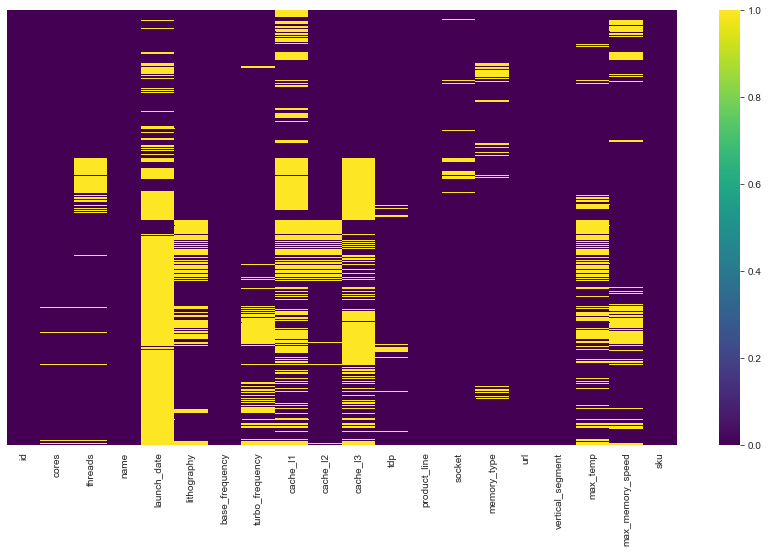

In [51]:
# Heat map for null for amd
sns.set({"figure.figsize" : (15,8)})
sns.heatmap(amd.isnull() , cbar = True , cmap = 'viridis' , yticklabels = False)

In [53]:
## Checking the null for intel.
intel.isnull().sum()

id                                  0
cores                               0
threads                             4
name                                0
processor_number                    0
launch_date                         0
lithography                         9
bus_speed                         385
base_frequency                     43
turbo_frequency                   227
configurable_tdp_up_frequency    1000
cache_size                          0
tdp                                54
configurable_tdp_up               996
price                             259
product_line                        0
socket                             52
memory_type                         4
url                                 0
vertical_segment                    0
max_memory_size                     6
status                              0
max_temp                          101
sku                                 0
package_size                       50
fullname                            0
dtype: int64

In [57]:
intel.isnull().any()

id                               False
cores                            False
threads                           True
name                             False
processor_number                 False
launch_date                      False
lithography                       True
bus_speed                         True
base_frequency                    True
turbo_frequency                   True
configurable_tdp_up_frequency     True
cache_size                       False
tdp                               True
configurable_tdp_up               True
price                             True
product_line                     False
socket                            True
memory_type                       True
url                              False
vertical_segment                 False
max_memory_size                   True
status                           False
max_temp                          True
sku                              False
package_size                      True
fullname                 

<AxesSubplot:>

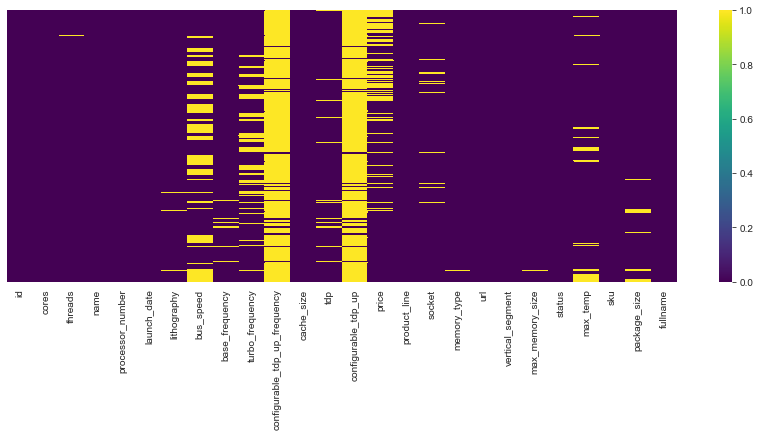

In [66]:
sns.set({'figure.figsize' : (15,5)})
sns.heatmap(intel.isnull() , cmap = 'viridis' , cbar = True , yticklabels = False)

In [67]:
cpubench.isnull().sum()

id              0
manufacturer    0
sku             0
rating          0
url             0
dtype: int64

<AxesSubplot:>

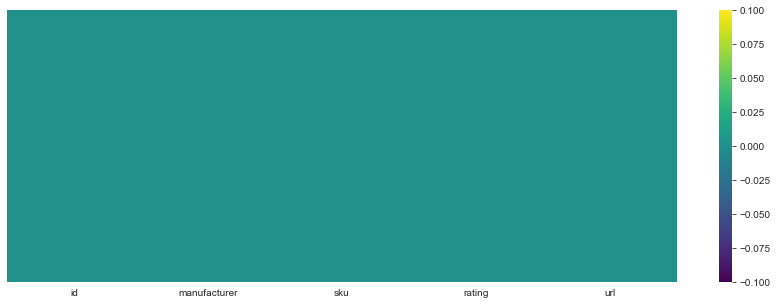

In [68]:
sns.set({'figure.figsize' : (15,5)})
sns.heatmap(cpubench.isnull() , cmap = 'viridis' , cbar = True , yticklabels = False)

#### CPU bench has no null values

In [71]:
amd.nunique().T

id                  538
cores                13
threads              15
name                525
launch_date          36
lithography           7
base_frequency       48
turbo_frequency      36
cache_l1             24
cache_l2             11
cache_l3             10
tdp                  35
product_line        127
socket               25
memory_type           9
url                 538
vertical_segment      6
max_temp             31
max_memory_speed     19
sku                 538
dtype: int64

In [72]:
intel.nunique()

id                               1098
cores                              18
threads                            20
name                             1090
processor_number                 1087
launch_date                        40
lithography                         4
bus_speed                           6
base_frequency                     46
turbo_frequency                    38
configurable_tdp_up_frequency      24
cache_size                         43
tdp                                96
configurable_tdp_up                 9
price                             322
product_line                       42
socket                             36
memory_type                        77
url                              1098
vertical_segment                    5
max_memory_size                    20
status                              3
max_temp                           52
sku                              1098
package_size                       48
fullname                         1098
dtype: int64

In [73]:
cpubench.nunique()

id              1667
manufacturer       2
sku             1667
rating          1584
url             1667
dtype: int64

In [75]:
amd.count()

id                  538
cores               533
threads             478
name                538
launch_date         185
lithography         440
base_frequency      538
turbo_frequency     457
cache_l1            285
cache_l2            476
cache_l3            331
tdp                 523
product_line        538
socket              520
memory_type         503
url                 538
vertical_segment    538
max_temp            407
max_memory_speed    442
sku                 538
dtype: int64

In [76]:
intel.count()

id                               1098
cores                            1098
threads                          1094
name                             1098
processor_number                 1098
launch_date                      1098
lithography                      1089
bus_speed                         713
base_frequency                   1055
turbo_frequency                   871
configurable_tdp_up_frequency      98
cache_size                       1098
tdp                              1044
configurable_tdp_up               102
price                             839
product_line                     1098
socket                           1046
memory_type                      1094
url                              1098
vertical_segment                 1098
max_memory_size                  1092
status                           1098
max_temp                          997
sku                              1098
package_size                     1048
fullname                         1098
dtype: int64

In [77]:
cpubench.count()

id              1667
manufacturer    1667
sku             1667
rating          1667
url             1667
dtype: int64

In [78]:
amd.cores.unique()
# Getting the unique values of core.

array([16., 12.,  8.,  6., 64., 32., 24.,  4.,  2., 56., 48., 28., nan,
        3.])

In [79]:
amd.base_frequency.unique()

array([3400, 3700, 3000, 3800, 3900, 2700, 3500, 4000, 2900, 3300, 3200,
       2800, 1900, 1800, 3100, 2300, 2100, 2600, 3600, 2000, 2200, 2400,
       1400, 1200, 2500, 1700, 1600,  200, 4100, 2450, 2950, 2750, 2850,
       2650, 2250, 2350, 1550, 1500, 4700, 4400, 4200,   56, 2050, 1300,
       1450, 1650, 1350, 1000], dtype=int64)

In [80]:
amd.turbo_frequency.unique()

array([4900., 4800., 4700., 4600., 4500., 4200., 4300., 4400., 4000.,
       3800., 3900., 4100., 3700., 3500.,   nan, 3300., 3200., 2800.,
       2600., 2300., 3400., 3600., 2900., 3100., 2700., 2500., 2400.,
       2200., 3000., 3675., 3650., 3450., 3350., 5000., 2000., 1800.,
       1500.])

In [81]:
amd.memory_type.unique()

array(['DDR4', 'DDR4 - Up to 3200MHz, LPDDR4 - Up to 4266MHz', 'LPDDR4',
       nan, 'DDR4, LPDDR4', 'DDR3', 'DDR3/DDR3L', 'Not Listed', 'DDR3L',
       'DDR2'], dtype=object)

In [82]:
amd.max_memory_speed.unique()

array([3200.,   nan, 2400., 4267., 2933., 2667., 1600., 2133., 1866.,
        186., 2666., 1333., 1865., 1599.,  800., 2000., 1800., 2200.,
       1400.,  667.])

In [83]:
amd.url.unique()

array(['https://www.amd.com/en/product/10456',
       'https://www.amd.com/en/product/10461',
       'https://www.amd.com/en/product/10796',
       'https://www.amd.com/en/product/10466',
       'https://www.amd.com/en/product/10791',
       'https://www.amd.com/en/product/10471',
       'https://www.amd.com/en/product/9931',
       'https://www.amd.com/en/product/9941',
       'https://www.amd.com/en/product/9936',
       'https://www.amd.com/en/product/10181',
       'https://www.amd.com/en/product/10176',
       'https://www.amd.com/en/product/10186',
       'https://www.amd.com/en/product/10191',
       'https://www.amd.com/en/product/9111',
       'https://www.amd.com/en/product/10801',
       'https://www.amd.com/en/product/10806',
       'https://www.amd.com/en/product/8941',
       'https://www.amd.com/en/product/10811',
       'https://www.amd.com/en/product/10816',
       'https://www.amd.com/en/product/8946',
       'https://www.amd.com/en/product/10821',
       'https://www

In [84]:
amd.id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [120]:
amd.drop(['id','url'],axis = 1).head()

,cores,threads,name,launch_date,lithography,base_frequency,turbo_frequency,cache_l1,cache_l2,cache_l3,tdp,product_line,socket,memory_type,vertical_segment,max_temp,max_memory_speed,sku
0,16.0,32.0,AMD Ryzen 9 5950X,2020-11-05,7.0,3400,4900.0,NaN,8192.0,65536.0,105.0,AMD Ryzen 9 Desktop Processors,AM4,DDR4,Boxed Processor,90.0,3200.0,10456
1,12.0,24.0,AMD Ryzen 9 5900X,2020-11-05,7.0,3700,4800.0,NaN,6144.0,65536.0,105.0,AMD Ryzen 9 Desktop Processors,AM4,DDR4,Boxed Processor,90.0,3200.0,10461
2,12.0,24.0,AMD Ryzen 9 5900 (OEM Only),2021-01-12,7.0,3000,4700.0,NaN,6144.0,65536.0,65.0,AMD Ryzen 9 Desktop Processors,AM4,DDR4,Desktop,95.0,3200.0,10796
3,8.0,16.0,AMD Ryzen 7 5800X,2020-11-05,7.0,3800,4700.0,NaN,4096.0,32768.0,105.0,AMD Ryzen 7 Desktop Processors,AM4,DDR4,Boxed Processor,90.0,3200.0,10466
4,8.0,16.0,AMD Ryzen 7 5800 (OEM Only),2021-01-12,7.0,3400,4600.0,NaN,4096.0,32768.0,65.0,AMD Ryzen 7 Desktop Processors,AM4,DDR4,Desktop,95.0,3200.0,10791


In [139]:
amd_cores = list(amd.cores.dropna().unique())
amd_cores
## Dropping the Na values of amd and get the unique values in list format instead of arrays.

[16.0, 12.0, 8.0, 6.0, 64.0, 32.0, 24.0, 4.0, 2.0, 56.0, 48.0, 28.0, 3.0]

##### Plotting the pie plot for AMD processor with no of cores.

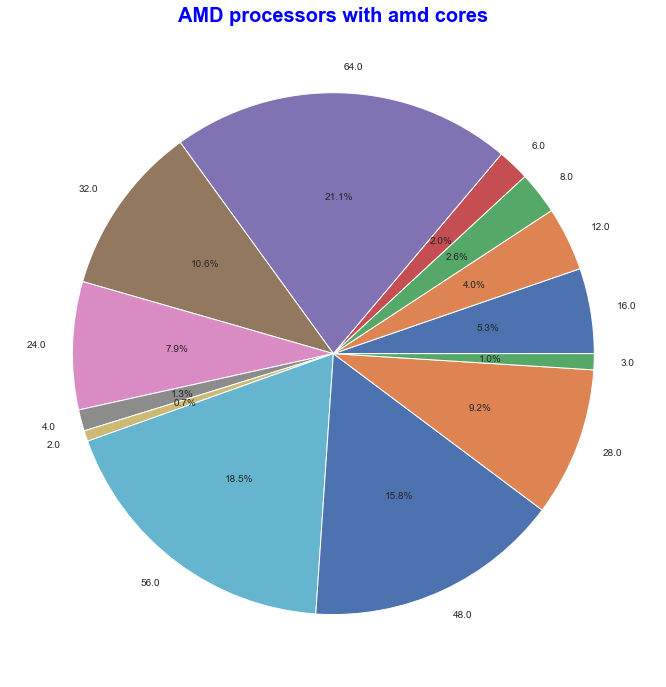

In [148]:
plt.figure(figsize = (12,12))
plt.pie(amd_cores , labels = amd_cores , autopct = "%1.1f%%")
plt.title("AMD processors with amd cores" , weight = 'bold' , color = 'blue' , size = 20)
plt.show()

#### PIL is the Python Imaging Library which provides the python interpreter with image editing capabilities.
#### Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance

In [190]:
sockets_amd = amd['socket'].value_counts()
sockets_amd

AM4         127
SP3          58
FP4          36
FP5          35
FP6          32
AM3+         30
G34          29
FM2+         29
AM3          25
FM2          22
C32          18
FT3          16
FT3b         14
S1           10
FP3           9
sTR4          7
AM1           5
FM1 uPGA      4
sWRX8         3
sTRX4         3
FT4           2
FT5           2
AM2+          2
939           1
FS1r2         1
Name: socket, dtype: int64

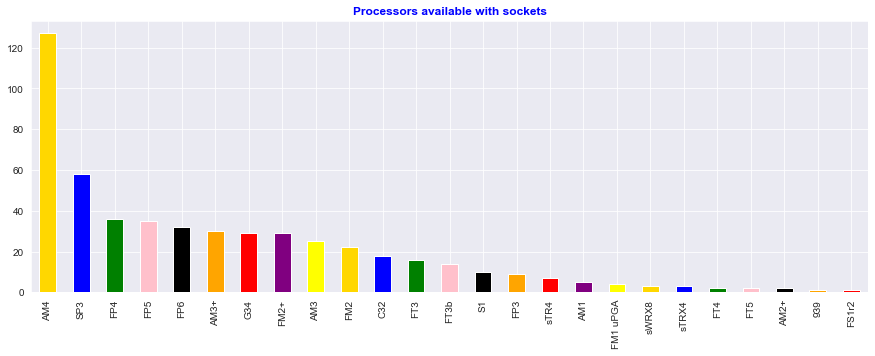

In [222]:
#PLotting the bar plot for amd processors available with sockets
plt.figure(figsize = (15,5))
#amd['socket'].value_counts().plot.bar()
sockets_amd.plot.bar(color = ['gold','blue','green','pink','black','orange','red','purple','yellow'])
plt.title('Processors available with sockets',color = 'blue', weight = 'bold')
plt.show()

In [223]:
intel.nunique()

id                               1098
cores                              18
threads                            20
name                             1090
processor_number                 1087
launch_date                        40
lithography                         4
bus_speed                           6
base_frequency                     46
turbo_frequency                    38
configurable_tdp_up_frequency      24
cache_size                         43
tdp                                96
configurable_tdp_up                 9
price                             322
product_line                       42
socket                             36
memory_type                        77
url                              1098
vertical_segment                    5
max_memory_size                    20
status                              3
max_temp                           52
sku                              1098
package_size                       48
fullname                         1098
dtype: int64

In [224]:
intel.cores.unique()

array([ 2,  4,  8, 16, 14, 20, 12, 18,  6, 22, 10, 24, 28, 26, 56, 32, 36,
       38], dtype=int64)

In [225]:
intel.max_memory_size.unique()

array([1.67772160e+07, 3.35544320e+07, 6.71088640e+07, 8.05306368e+08,
       1.61061274e+09, 8.38860800e+06, 1.07374182e+09, 9.21698304e+06,
       4.19430400e+06, 1.34217728e+08, 4.83183821e+09, 1.71756749e+07,
       1.20259084e+09,            nan, 6.44245094e+09, 2.68435456e+08,
       6.73500365e+07, 6.75807232e+07, 5.36870912e+08, 2.14748365e+09,
       4.29496730e+09])

In [231]:
intel['base_frequency'].unique()

array([1700., 3100., 3400., 2600., 2400., 2000., 2200., 2700., 2800.,
       3500., 2500., 1300., 3000., 1500., 2300., 3200., 2900., 1400.,
       1600., 1900., 1800., 3300., 2100., 3900., 3600., 4000., 2410.,
       1200., 1460., 1860., 2130., 1830., 2160., 1580., 3800., 3700.,
       4200., 1040., 1100., 2260., 1250., 1000.,  800.,  700., 4100.,
         nan, 4300.])

In [232]:
intel.turbo_frequency.unique()

array([2000.,   nan, 4100., 4000., 3600., 3400., 3000., 3100., 3200.,
       3800., 3900., 3700., 2600., 1900., 3300., 2900., 2300., 3500.,
       2700., 4200., 2800., 4400., 2500., 4300., 4500., 4700., 4600.,
       2400., 5000., 2200., 4800., 4900., 2100., 1700., 1600., 5100.,
       5300., 5200., 1300.])

In [239]:
intel.memory_type.unique()

array(['DDR3/DDR3L 1333', 'DDR4-2400',
       'DDR4-1866/2133, DDR3L-1333/1600 @ 1.35V', 'DDR3L 1333/1600',
       'DDR3L 1333/1600, LPDDR3 1600/1866',
       'DDR3L 1333/1600, LPDDR3 1333/1600', 'DDR3L 1600',
       'DDR3-1333/1600, DDR3L-1333/1600 @ 1.5V',
       'DDR3 and DDR3L 1333/1600 at 1.5V', 'DDR3 1333/1600',
       'DDR3L-1333, 1600; LPDDR3-1333, 1600',
       'DDR3L 1600/1866 LPDDR3 1600/1866', 'DDR3L-1333/1600/1866 @ 1.5V',
       'DDR4-2666', 'DDR3L-1333/1600 @ 1.5V',
       'DDR4-2133, LPDDR3-1866, DDR3L-1600',
       'DDR4-2133, LPDDR3 - 1866, DDR3L-1600', 'DDR3L 1333', 'DDR3L-1600',
       'DDR3L/LPDDR3 up to 1866 MT/s; LPDDR4 up to 2400 MT/s',
       'DDR4/LPDDR4 upto 2400 MT/s', 'LPDDR3-1866, DDR3L-1600',
       'DDR4-2400, LPDDR3-2133, DDR3L-1600',
       'DDR4-2133/2400, DDR3L-1333/1600 @ 1.35V', '2667', 'DDR4-2933',
       '4x32 LPDDR4/x 3733MT/s Max (8GB, 16GB @3200MT/s) / 2x64 DDR4 3200MT/s Max 32GB',
       'DDR3L 1066', 'DDR4-2400, LPDDR3-2133', 'DDR4-2666, LPD

In [240]:
intel.drop(['id' , 'url'],axis = 1 , inplace = True)

In [242]:
intel_cores = list(intel.cores.unique())
intel_cores
# Get the cores in list format.

[2, 4, 8, 16, 14, 20, 12, 18, 6, 22, 10, 24, 28, 26, 56, 32, 36, 38]

In [244]:
intel_cores = list(intel.cores.dropna().unique())
intel_cores

[2, 4, 8, 16, 14, 20, 12, 18, 6, 22, 10, 24, 28, 26, 56, 32, 36, 38]

#### There is no na values in intel cores

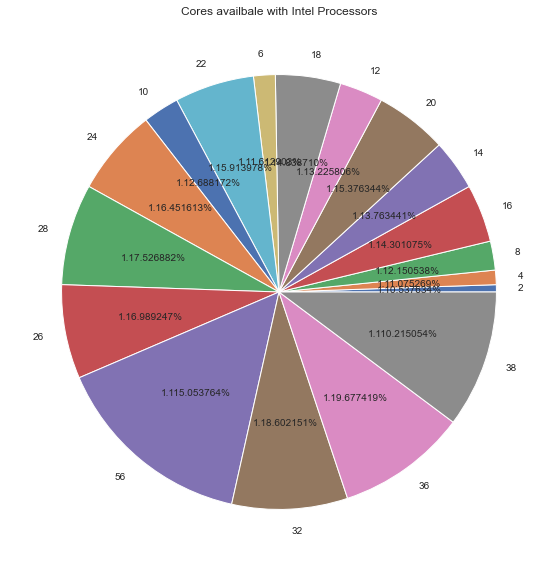

In [263]:
## Plotting the cores availabe in intel processor.
plt.figure(figsize = (10,10))
plt.pie(intel_cores , labels = intel_cores , autopct = '1.1%f%%')
plt.title('Cores availbale with Intel Processors')
plt.show()

In [273]:
## Plotting the no bar plot for available sockets in intel processor.
sockets_intel = intel.socket.value_counts()
print(sockets_intel)

FCLGA3647                151
FCLGA1151                137
FCLGA1200                111
FCBGA1440                 72
FCLGA1150                 61
FCLGA4189                 57
FCBGA1168                 51
FCBGA1364                 44
FCLGA2066                 38
FCBGA1667                 37
FCBGA1356                 28
FCBGA1528                 26
FCBGA1449                 26
FCBGA1170                 24
FCBGA1787                 21
FCBGA1310                 20
FCPGA946                  18
FCBGA1283                 17
FCBGA1090                 16
FCBGA2518                 14
FCBGA1515                 10
FCBGA1338                  8
BGA2270                    7
FCLGA2011                  7
FCLGA2011-3                7
FCBGA1598                  6
FCBGA1526                  5
FCLGA1155                  5
FCBGA1493                  4
FCBGA1296                  4
UTFCBGA1377                4
FC-BGA1356                 4
FCBGA1344                  2
FCPGA988                   2
FC-BGA1356, FC

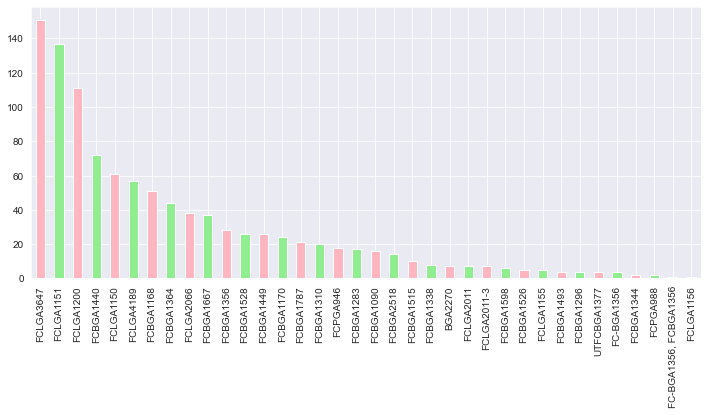

In [279]:
plt.figure(figsize = (12,5))
sockets_intel.plot.bar(color = ['lightpink','lightgreen'])
plt.show()

<AxesSubplot:>

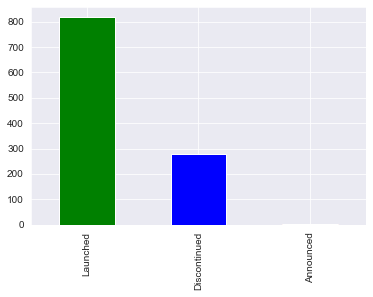

In [281]:
### Now of processors that is launched or yet to launched.
intel['status'].value_counts().plot.bar(color = ['green','blue','red'])

<AxesSubplot:xlabel='status', ylabel='cores'>

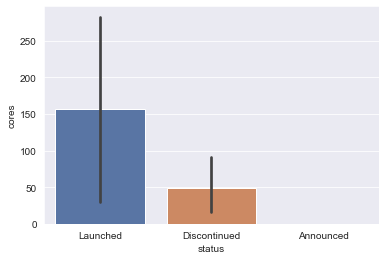

In [287]:
sns.barplot(x = intel['status'] , y = intel['cores'].value_counts())

Text(0.5, 1.0, 'Types of vertical segment in which Intel offers processors')

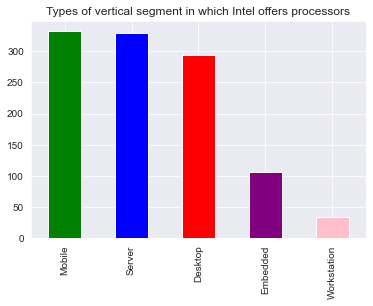

In [297]:
## Memory type in which intel offers processors
intel['vertical_segment'].value_counts().plot.bar(color = ['green','blue','red','purple','pink'])
plt.title('Types of vertical segment in which Intel offers processors')

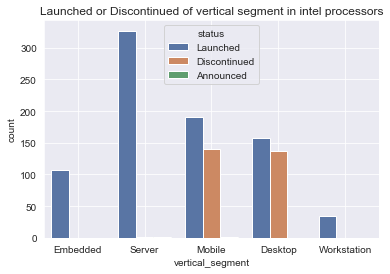

In [309]:
sns.countplot(x = 'vertical_segment' , hue = 'status' , data = intel)
plt.title("Launched or Discontinued of vertical segment in intel processors")
plt.grid(True)
plt.show()

##### REL is a modular Entity Linking package that is provided as a Python package as well as a web API.

##### Registered Event Listener. Provides standard (pyevent) interface and functionality without external dependencies.

No handles with labels found to put in legend.


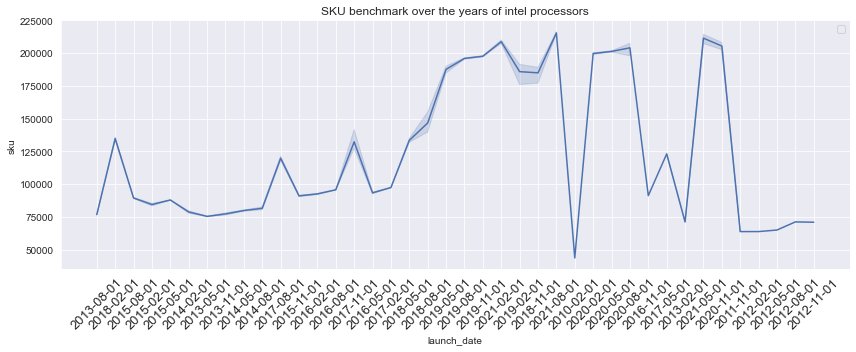

In [333]:
## SKU benchmark for intel processors over the years.
sns.set({'figure.figsize' : (12,5)})
sns.lineplot(x = intel['launch_date'] , y = intel['sku'])
plt.title("SKU benchmark over the years of intel processors")
plt.legend(loc = 'best')
plt.xticks(size = 13 , rotation = 45)
plt.tight_layout()
plt.show()

In [365]:
amd['launch_date'] = pd.to_datetime(amd['launch_date'])
amd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                538 non-null    int64         
 1   cores             533 non-null    float64       
 2   threads           478 non-null    float64       
 3   name              538 non-null    object        
 4   launch_date       185 non-null    datetime64[ns]
 5   lithography       440 non-null    float64       
 6   base_frequency    538 non-null    int64         
 7   turbo_frequency   457 non-null    float64       
 8   cache_l1          285 non-null    float64       
 9   cache_l2          476 non-null    float64       
 10  cache_l3          331 non-null    float64       
 11  tdp               523 non-null    float64       
 12  product_line      538 non-null    object        
 13  socket            520 non-null    object        
 14  memory_type       503 non-

In [367]:
amd['month'] = amd['launch_date'].dt.month
amd.head()

,id,cores,threads,name,launch_date,lithography,base_frequency,turbo_frequency,cache_l1,cache_l2,...,tdp,product_line,socket,memory_type,url,vertical_segment,max_temp,max_memory_speed,sku,month
0,1,16.0,32.0,AMD Ryzen 9 5950X,2020-11-05,7.0,3400,4900.0,NaN,8192.0,...,105.0,AMD Ryzen 9 Desktop Processors,AM4,DDR4,https://www.amd.com/en/product/10456,Boxed Processor,90.0,3200.0,10456,11.0
1,2,12.0,24.0,AMD Ryzen 9 5900X,2020-11-05,7.0,3700,4800.0,NaN,6144.0,...,105.0,AMD Ryzen 9 Desktop Processors,AM4,DDR4,https://www.amd.com/en/product/10461,Boxed Processor,90.0,3200.0,10461,11.0
2,3,12.0,24.0,AMD Ryzen 9 5900 (OEM Only),2021-01-12,7.0,3000,4700.0,NaN,6144.0,...,65.0,AMD Ryzen 9 Desktop Processors,AM4,DDR4,https://www.amd.com/en/product/10796,Desktop,95.0,3200.0,10796,1.0
3,4,8.0,16.0,AMD Ryzen 7 5800X,2020-11-05,7.0,3800,4700.0,NaN,4096.0,...,105.0,AMD Ryzen 7 Desktop Processors,AM4,DDR4,https://www.amd.com/en/product/10466,Boxed Processor,90.0,3200.0,10466,11.0
4,5,8.0,16.0,AMD Ryzen 7 5800 (OEM Only),2021-01-12,7.0,3400,4600.0,NaN,4096.0,...,65.0,AMD Ryzen 7 Desktop Processors,AM4,DDR4,https://www.amd.com/en/product/10791,Desktop,95.0,3200.0,10791,1.0
